# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Here we import all necessary Python packages to solve the tasks:

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from ExchangeEconomy import ExchangeEconomyClass

In [4]:
model = ExchangeEconomyClass()

# Question 1

We used a self-defined function to get all pareto-improvments and later plotted all solutions in an Egdeworth-Box.


0.3333333333333333
namespace(alpha=0.3333333333333333, beta=0.6666666666666666, p2=1, w1A=0.8, w2A=0.3)
0.41601676461038084
0.30365889718756617
[[0.08       0.96      ]
 [0.09333333 0.88      ]
 [0.09333333 0.89333333]
 ...
 [0.78666667 0.34666667]
 [0.78666667 0.36      ]
 [0.78666667 0.37333333]]


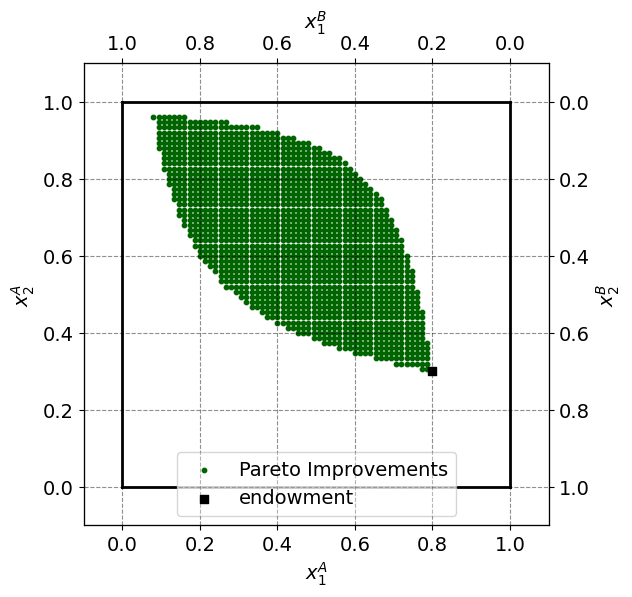

In [13]:
import numpy as np
model = ExchangeEconomyClass()
parameters = model.par
print(parameters.alpha)
print(parameters)
utility_personA = model.utility_A(parameters.w1A, parameters.w2A)
print(utility_personA)
utility_personB = model.utility_B(1-parameters.w1A, 1-parameters.w2A)
print(utility_personB)


# code for solving the model 
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

## here define the function for comparison
def is_pareto(x1A, x2A): 
    x1B, x2B = 1 - x1A, 1 - x2A
    return model.utility_A(x1A, x2A) >= utility_personA and model.utility_B(x1B, x2B) >= utility_personB


## loop over x1 and x2 and get all combinations
N = 75 ## given in the Task! 
pareto_improvements = []
for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        if is_pareto(x1A, x2A):
            pareto_improvements.append((x1A, x2A))



# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

#Plotting Pareto improvements and initial endowment
pareto_improvements = np.array(pareto_improvements)
print(pareto_improvements)
ax_A.scatter(pareto_improvements[:, 0], pareto_improvements[:, 1], color='darkgreen', label='Pareto Improvements', s=10)
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

## add legend with pareto improvments and initial endowments
ax_A.legend()





# Question 2

Explain your code and procedure

In [3]:
# code

# Question 3

Explain your code and procedure

In [4]:
# code

ADD CONCISE CONLUSION.